In [1]:
from iterative_searcher.iterative_searcher import IterativeSearcher
from Qommunity.samplers.hierarchical.advantage_sampler import AdvantageSampler
from Qommunity.searchers.hierarchical_community_searcher import HierarchicalCommunitySearcher

import networkx as nx
import numpy as np

In [2]:
import os


dir = "networks"
os.makedirs(os.path.dirname(dir+"/"), exist_ok=True)


def make_dir(dir):
    if not os.path.exists(dir):
        os.mkdir(dir)

In [3]:
m = 1
p = 0.2

In [4]:
dir = f"networks/powerlaw_m={m}_p={p}"
os.makedirs(os.path.dirname(dir+"/"), exist_ok=True)

In [5]:
import numpy as np


MIN_NODES = 10
MAX_NODES = 100

num_nodes = np.linspace(MIN_NODES, MAX_NODES, MAX_NODES//MIN_NODES)
num_nodes

array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

In [6]:
import numpy as np
import networkx as nx


try:
    Graphs = np.load(f"{dir}/graphs.npy", allow_pickle=True)
except:
    Graphs = np.empty(shape=(len(num_nodes),), dtype=object)
    for i, n in enumerate(num_nodes):
        Graphs[i] = nx.powerlaw_cluster_graph(n=n, m=m, p=p)
    np.save(f"{dir}/graphs.npy", Graphs)

In [7]:
# output folder
dir =dir+"/output"
os.makedirs(os.path.dirname(dir+"/"), exist_ok=True)

Advantage

In [8]:
solver = "adv"
make_dir(f"{dir}/{solver}")

In [19]:
num_runs = 25

mods = np.zeros((num_nodes.shape[0], num_runs))
comms = np.empty((num_nodes.shape[0], num_runs), dtype=object)
times = np.zeros((num_nodes.shape[0], num_runs))

for i, G in enumerate(Graphs):
    adv_sampler = AdvantageSampler(G, num_reads=100, use_clique_embedding=True)
    searcher = HierarchicalCommunitySearcher(adv_sampler)
    iterative_searcher = IterativeSearcher(searcher)

    saving_path = f"{dir}/{solver}/{solver}-network_size_{G.number_of_nodes()}"
    communities, modularities, times_elapsed = iterative_searcher.run(num_runs=num_runs, saving_path=saving_path)

    try:
        comms[i] = communities
        mods[i] = modularities
        times[i] = times_elapsed
    except Exception as e:
        print(e)

np.save(f"{dir}/{solver}/{solver}-mods_final", mods)
np.save(f"{dir}/{solver}/{solver}-comms_final", comms)
np.save(f"{dir}/{solver}/{solver}-times", times)

 84%|████████▍ | 21/25 [1:26:44<16:43, 250.94s/it]Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x00000202BC39D7B0>>
Traceback (most recent call last):
  File "C:\Users\basia\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 785, in _clean_thread_parent_frames
    active_threads = {thread.ident for thread in threading.enumerate()}
  File "C:\Users\basia\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 785, in <setcomp>
    active_threads = {thread.ident for thread in threading.enumerate()}
MemoryError: 
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x00000202BC39D7B0>>
Traceback (most recent call last):
  File "C:\Users\basia\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 785, in _clean_thread_parent_frames
    active_threads = {thread.ident for thre

In [10]:
for g in Graphs[7:]:
    print(g.number_of_nodes())

80
90
100


### Finish it up - nodes 80 (to continue), 90 and 100
This time I added measuring time

In [11]:
num_runs = 25

start_idx = 7

mods = np.zeros((num_nodes[start_idx:].shape[0], num_runs))
comms = np.empty((num_nodes[start_idx:].shape[0], num_runs), dtype=object)
times = np.zeros((num_nodes[start_idx:].shape[0], num_runs))

for i, G in enumerate(Graphs[start_idx:]):
    adv_sampler = AdvantageSampler(G, num_reads=100, use_clique_embedding=True)
    searcher = HierarchicalCommunitySearcher(adv_sampler)
    iterative_searcher = IterativeSearcher(searcher)

    saving_path = f"{dir}/{solver}/{solver}-network_size_{G.number_of_nodes()}"
    communities, modularities, times_elapsed = iterative_searcher.run(num_runs=num_runs, saving_path=saving_path)

    try:
        comms[i] = communities
        mods[i] = modularities
        times[i] = times_elapsed
    except Exception as e:
        print(e)

np.save(f"{dir}/{solver}/{solver}-mods_final", mods)
np.save(f"{dir}/{solver}/{solver}-comms_final", comms)
np.save(f"{dir}/{solver}/{solver}-times", times)

100%|██████████| 25/25 [1:12:24<00:00, 173.79s/it]


In [12]:
import numpy as np

In [17]:
comms_adv_clique = [np.load(f"{dir}/{solver}/{solver}-network_size_{n}_comms.npy", allow_pickle=True) for n in range(10, 110, 10)]
mods_adv_clique = [np.load(f"{dir}/{solver}/{solver}-network_size_{n}.npy") for n in range(10, 110, 10)]

In [18]:
mods_adv_clique

[array([0.36419753, 0.36419753, 0.36419753, 0.36419753, 0.36419753,
        0.36419753, 0.36419753, 0.36419753, 0.36419753, 0.36419753,
        0.36419753, 0.36419753, 0.36419753, 0.36419753, 0.36419753,
        0.36419753, 0.36419753, 0.36419753, 0.36419753, 0.36419753,
        0.36419753, 0.36419753, 0.36419753, 0.36419753, 0.36419753]),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 array([0.59096314, 0.59096314, 0.59096314, 0.59096314, 0.59096314,
        0.59096314, 0.59096314, 0.59096314, 0.59096314, 0.59096314,
        0.59096314, 0.59096314, 0.59096314, 0.59096314, 0.59096314,
        0.59096314, 0.59096314, 0.59096314, 0.59096314, 0.59096314,
        0.59096314, 0.59096314, 0.59096314, 0.59096314, 0.59096314]),
 array([0.68014464, 0.66896778, 0.68014464, 0.68014464, 0.68014464,
        0.68014464, 0.68014464, 0.68014464, 0.68014464, 0.68014464,
        0.68014464, 0.68014464, 0.680

In [19]:
np.array(mods_adv_clique).max(axis=-1)

array([0.36419753, 0.5       , 0.59096314, 0.68014464, 0.69950021,
       0.73369721, 0.72075194, 0.7507611 , 0.79251357, 0.79650036])

Leiden

In [22]:
solver = "leiden"
make_dir(f"{dir}/{solver}")

In [23]:
from Qommunity.samplers.regular.leiden_sampler import LeidenSampler
from Qommunity.searchers.community_searcher.community_searcher import CommunitySearcher

In [27]:
num_runs = 100

mods = np.zeros((num_nodes.shape[0], num_runs))
comms = np.empty((num_nodes.shape[0], num_runs), dtype=object)
times = np.zeros((num_nodes.shape[0], num_runs))

for i, G in enumerate(Graphs):
    leiden_sampler = LeidenSampler(G)
    searcher = CommunitySearcher(leiden_sampler)
    iterative_searcher = IterativeSearcher(searcher)

    saving_path = f"{dir}/{solver}/{solver}-network_size_{G.number_of_nodes()}"
    communities, modularities, times_elapsed = iterative_searcher.run(num_runs=num_runs, saving_path=saving_path)

    try:
        comms[i] = communities
        mods[i] = modularities
        times[i] = times_elapsed
    except Exception as e:
        print(e)

np.save(f"{dir}/{solver}/{solver}-mods_final", mods)
np.save(f"{dir}/{solver}/{solver}-comms_final", comms)
np.save(f"{dir}/{solver}/{solver}-times", times)

100%|██████████| 100/100 [00:00<00:00, 298.70it/s]


In [27]:
comms_leiden = [np.load(f"{dir}/{solver}/{solver}-network_size_{n}_comms.npy", allow_pickle=True) for n in range(10, 110, 10)]
mods_leiden = [np.load(f"{dir}/{solver}/{solver}-network_size_{n}.npy") for n in range(10, 110, 10)]

In [28]:
maxes_leiden = np.array(mods_leiden).max(axis=-1)
maxes_leiden

array([0.36419753, 0.5       , 0.59096314, 0.68014464, 0.70116618,
       0.73369721, 0.72075194, 0.7507611 , 0.79251357, 0.79650036])

In [25]:
maxes_adv_clique = np.array(mods_adv_clique).max(axis=-1)
maxes_adv_clique

array([0.36419753, 0.5       , 0.59096314, 0.68014464, 0.69950021,
       0.73369721, 0.72075194, 0.7507611 , 0.79251357, 0.79650036])

In [29]:
for lei, adv in zip(maxes_leiden, maxes_adv_clique):
    print(lei, adv)

0.36419753086419754 0.36419753086419754
0.4999999999999999 0.49999999999999994
0.5909631391200951 0.5909631391200951
0.6801446416831032 0.6801446416831032
0.7011661807580175 0.699500208246564
0.7336972134444125 0.7336972134444126
0.7207519428691451 0.7207519428691452
0.7507610959782086 0.7507610959782087
0.7925135715187477 0.7925135715187477
0.7965003571064178 0.7965003571064178


In [47]:
np.where(np.isclose(maxes_leiden, maxes_adv_clique)==False)[0]

array([4], dtype=int64)

In [48]:
maxes_leiden[4]

0.7011661807580175

In [49]:
maxes_adv_clique[4]

0.699500208246564

In [50]:
maxes_adv_clique

array([0.36419753, 0.5       , 0.59096314, 0.68014464, 0.69950021,
       0.73369721, 0.72075194, 0.7507611 , 0.79251357, 0.79650036])

In [51]:
import matplotlib.pyplot as plt

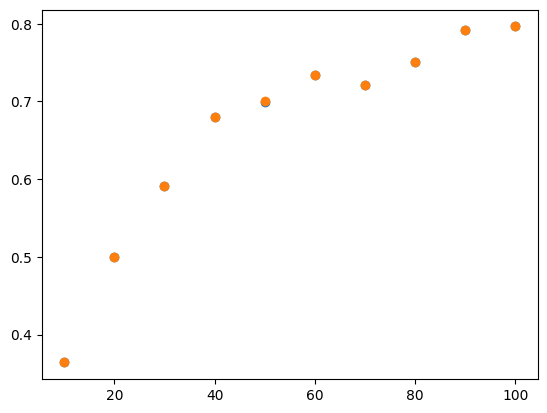

In [58]:
plt.scatter(num_nodes, maxes_adv_clique)
plt.scatter(num_nodes, maxes_leiden)
# plt.plot()

(5.0, 110.0)

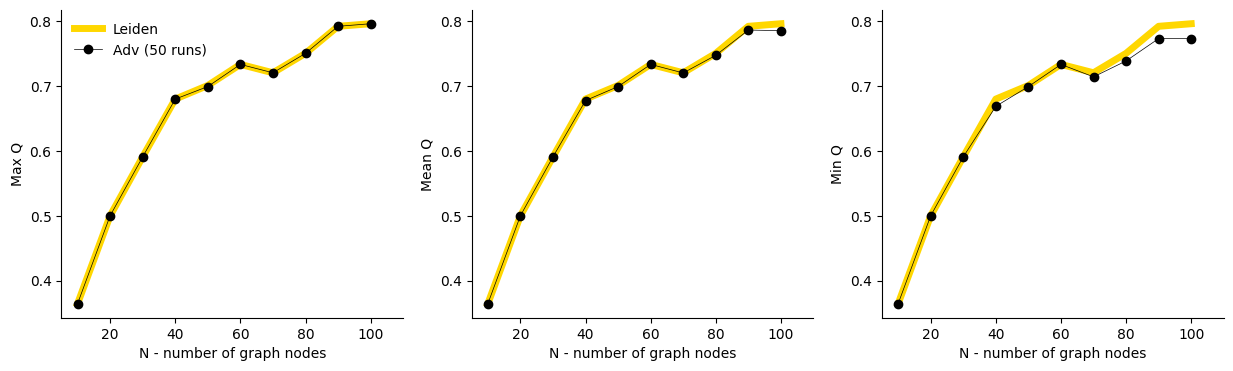

In [62]:
from matplotlib import pyplot as plt


fig, ax = plt.subplots(1,3,figsize=(15,4))
ax[0].plot(num_nodes, np.array(mods_leiden).max(axis=-1), '-', label="Leiden", linewidth=5, color='gold')
ax[0].plot(num_nodes, np.array(mods_adv_clique).max(axis=-1), '-o', label="Adv (50 runs)", linewidth=0.5, color='black')
ax[0].legend(frameon=False)
ax[0].spines[["top","right"]].set_visible(False)
ax[0].set_xlabel("N - number of graph nodes");
ax[0].set_ylabel("Max Q");
ax[0].set_xlim([-5+num_nodes[0],num_nodes[-1]+10])

ax[1].plot(num_nodes, np.array(mods_leiden).mean(axis=-1), '-', linewidth=5, color='gold')
ax[1].plot(num_nodes, np.array(mods_adv_clique).mean(axis=-1), '-o', linewidth=0.5, color='black')
ax[1].spines[["top","right"]].set_visible(False)
ax[1].set_xlabel("N - number of graph nodes");
ax[1].set_ylabel("Mean Q");
ax[1].set_xlim([-5+num_nodes[0],num_nodes[-1]+10])

ax[2].plot(num_nodes, np.array(mods_leiden).min(axis=-1), '-', linewidth=5, color='gold')
ax[2].plot(num_nodes, np.array(mods_adv_clique).min(axis=-1), '-o', linewidth=0.5, color='black')
ax[2].spines[["top","right"]].set_visible(False)
ax[2].set_xlabel("N - number of graph nodes");
ax[2].set_ylabel("Min Q");
ax[2].set_xlim([-5+num_nodes[0],num_nodes[-1]+10])